<h1 align = 'center', style = 'font-family:verdana'>DEVELOPMENT OF A MACHINE LEARNING MODEL TO ESTIMATE THE CREDIT WORTHINESS OF LOAN APPLICANTS </h1>

<h2 align = 'center', style = 'font-family:verdana'>JOSEPH SEGBEFIA (B1011628)</h3>
<h3 align = 'center', style = 'font-family:verdana'>GISMA Business School</h3>
<h4 align = 'center', style = 'font-family:verdana'> MSc. Business Intelligence and Analytics</h4>

<h4 align = 'center', style = 'color:blue'; 'font-family:verdana'>Predictive Analytics</h4>

<p style = 'font-family:verdana'>Problem Statement: A payday loan company used human experts to assess the credit risk of 988 credit applications. The aim is to use this input to create a system that would estimate the credit risk of new applications.

<h3 style = 'font-family:verdana'>ABSTRACT</h3>
<p style = 'font-family:verdana'>The objective of this project is to develop a machine learning model to help estimate or predict the credit worthiness of loan applicants. The estimation/prediction will be done by looking at some information (features) on each applicant. This is a case of supervised machine learning technique called classification, where the algorithm is first trained on features of each applicant, and used to classify new applicants as 'worthy' or 'not worthy' for a loan.</p>

<h3 style = 'font-family:verdana'>INTRODUCTION</h3>
<p style = 'font-family:verdana'>In recent times, most industries are on the path of digital transformation and machine learning is at the center of this revolution. Institutions like banks, loan companies, e-commerce companies and hospitals usually employ machine learning to make their work easier. Of all the industries on the path of digital transformation, financial institutions, like loan companies and banks are at the top of the list of those that can benefit the most. Loan companies for example use machine learning which helps them become more agile, and also gives them the ability to process loans faster and more accurately. 
</p>
<p style = 'color:red'>Remember to complete this section </p>

<h3 style = 'font-family:verdana'>METHODOLOGY</h3>
<p style = 'color:red'>Remember to complete this section </p>

<h4 style = 'font-family:verdana'> The Data and Exploratory Data Analysis</h4>

In [1]:
#IMPORTING LIBRARIES AND DEPENDENCIES
#Import dependencies
%matplotlib inline

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [2]:
#Loading the data into a pandas dataframe called data
data = pd.read_excel('./Datasets/data.xlsx')

print('The dataframe has {} rows and {} columns'.format(data.shape[0], data.shape[1]))

The dataframe has 988 rows and 22 columns


<h4 style = 'font-family:verdana'>The Data</h4>
<p style = 'font-family:verdana'> The dataset is made up of 988 rows. This means that it contains information on 988 loan applicants, where each row represents one applicant. In addition to the number of rows, it has twenty-two (22) columns (features). The features or columns include; 'foreignworker', 'status', 'credithistory', 'purpose', and 'savings' just to name a few. Among these features, is the target variable (the variable the machine learning model predicts) is the creditworthy column. In order for the machine learning model to predict the credit worthiness of future applicants, it must be first trained using the other features. The data types of the features in the dataset are: 'string' which is usually represnted as 'object' and 'numeric' usually represented as an 'integer (int64)' or a 'float (float64)'. The cell below shows the datatype and the non-null value counts for each column. As can be seen, the data contains no values.</p>
<p style = 'color:red'>Review this section</p>

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   foreignworker             988 non-null    object 
 1   status                    988 non-null    object 
 2   credithistory             988 non-null    object 
 3   purpose                   988 non-null    object 
 4   savings                   988 non-null    object 
 5   employmentsince           988 non-null    object 
 6   otherdebtors              988 non-null    object 
 7   property                  988 non-null    object 
 8   otherinstallments         988 non-null    object 
 9   housing                   988 non-null    object 
 10  job                       988 non-null    object 
 11  phone                     988 non-null    object 
 12  duration                  988 non-null    int64  
 13  creditamount              988 non-null    int64  
 14  installmen

<h4 style = 'font-family:verdana'>Exploratory Data Analysis</h4>
<p style = 'font-family:verdana'> Exploratory Data Analysis (EDA) is usually on of the first things a data scientist or data analyst does to the data. The main purpose of performing Exploratory Data Analysis is to help the data scientist have a look at the data he has before making any assumptions. It helps to identify obvious errors and also to identify and understand patterns within the data, detect outliers and also to find relationships and associations between variables. In the next few cells, exploratory data analysis will be performed on the dataset to help bring out hidden information in the data before a machine learning model can be fitted.</p>

  foreignworker      status                             credithistory  \
0           yes    < 0 Euro                         critical account/   
1           yes  < 200 Euro  existing credits paid back duly till now   

            purpose                      savings     employmentsince  \
0  radio/television  unknown/ no savings account       .. >= 7 years   
1  radio/television               ... < 100 Euro  1 <= ... < 4 years   

  otherdebtors     property otherinstallments housing  ... duration  \
0         none  real estate              none     own  ...        6   
1         none  real estate              none     own  ...       48   

  creditamount  installmentrate  residencesince  age  \
0         1169                4               4   67   
1         5951                2               2   22   

   numberofexsistingcredits  numberofliablepeople  gender  creditworthy  \
0                         2                     1    male        Worthy   
1                         1   

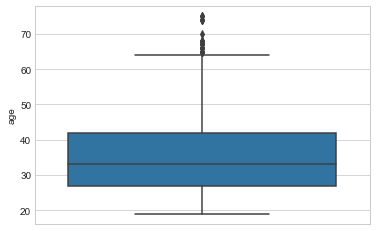

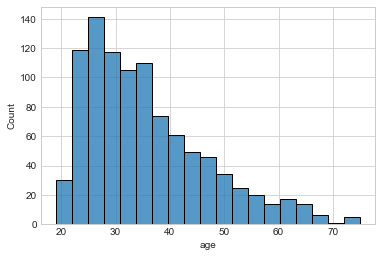

In [21]:
#Performing Exploratory Data Analysis
print(data.head(2)) #Printing the first 2 rows of the dataframe
print('')

#Extracting the ages of the loan applicants into a variable called ages
ages = data['age']
print('The youngest applicant is {} years'.format(np.min(ages)))
print('The oldest applicant is {} years'.format(np.max(ages)))
print('The average age of an applicant is {:.2f} years'.format(np.mean(ages)))
print('')

#Making a boxplot of the ages to reflect the median age, minimum age, maximum age, and any outliers present in the age
#column
sns.boxplot(y = ages)
plt.show()


#Making a histogram of the ages
sns.histplot(ages)
plt.show()

In [15]:
data['savings'].unique()

array(['unknown/ no savings account', '... < 100 Euro',
       '500 <= ... < 1000 Euro', '.. >= 1000 Euro',
       '100 <= ... < 500 Euro'], dtype=object)